In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## For inbuild dataset

In [3]:
# from sklearn.datasets import fetch_20newsgroups
# df = fetch_20newsgroups()
# categories = df.target_names

In [4]:
# # categories
# df

In [5]:
# train = fetch_20newsgroups(subset='train',categories=categories)

In [6]:
# test = fetch_20newsgroups(subset='test', categories=categories)

In [7]:
# test.target

test

In [8]:
# test

## For my Dataset

In [9]:
df=pd.read_csv("C:/Users/ashwa/OneDrive/Desktop/text.csv")
df = df.iloc[:, 1:]

In [10]:
df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [58]:
df.label.value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [65]:
df_1=df[df['label'] == 1]
df_0=df[df['label'] == 0]
df_2=df[df['label'] == 2]
df_3=df[df['label'] == 3]
df_4=df[df['label'] == 4]
df_5=df[df['label'] == 5]

In [89]:
from sklearn.utils import resample
df_0_upsample=resample(df_0,n_samples=142000,replace=True,random_state=123)
df_2_upsample=resample(df_2,n_samples=142000,replace=True,random_state=123)
df_3_upsample=resample(df_3,n_samples=142000,replace=True,random_state=123)
df_4_upsample=resample(df_4,n_samples=142000,replace=True,random_state=123)
df_5_upsample=resample(df_5,n_samples=142000,replace=True,random_state=123)

In [90]:
label_df=pd.concat([df_1,df_0_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])
label_df['label'].value_counts()

label
0    142000
2    142000
3    142000
4    142000
5    142000
1    141067
Name: count, dtype: int64

In [100]:
df=label_df
df

,text,label
7,i fear that they won t ever feel that deliciou...,1
10,i try to be nice though so if you get a bitchy...,1
12,i have officially graduated im not feeling as ...,1
14,i feel my portfolio demonstrates how eager i a...,1
15,i may be more biased than the next because i h...,1
...,...,...
75780,i will take the guest bed common courtesy and ...,5
136722,i had a chat with my director about how i was ...,5
27902,i feel like it will be strange to eat out at a...,5
234614,im feeling the urge to do some rearranging her...,5


In [101]:
categories =['sadness', 'joy', 'love' , 'anger', 'fear' ,'surprise']

In [102]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)


In [103]:
df_test

,text,label
25903,i do not feel that her action is funny even it...,5
138899,i feel like in this episode they totally ignor...,0
239252,i feel that is the one thing people say about ...,1
310724,i am acutely aware that feeling in need of aff...,3
181865,im lost im feeling insecure,4
...,...,...
27450,i feel like your runs are amazing she added,1
28782,i met a lot of new people and for some reason ...,4
174327,i feel completely agitated praying whoever it ...,4
239796,i have to stand up and say what i feel for my ...,2


In [104]:
df_train

,text,label
122836,ive been feeling stressed by too much opportunity,3
384869,i am feeling very shaky without it,4
99721,i know what the right thing to do is i am just...,2
252083,i still feel naughty posting this,2
314248,im feeling agitated about it already,4
...,...,...
199065,i feel very ashamed about,0
368046,im feeling horny and i cant help it,2
389747,i feel that should be respected,1
108728,i really feel afraid and trembling,4


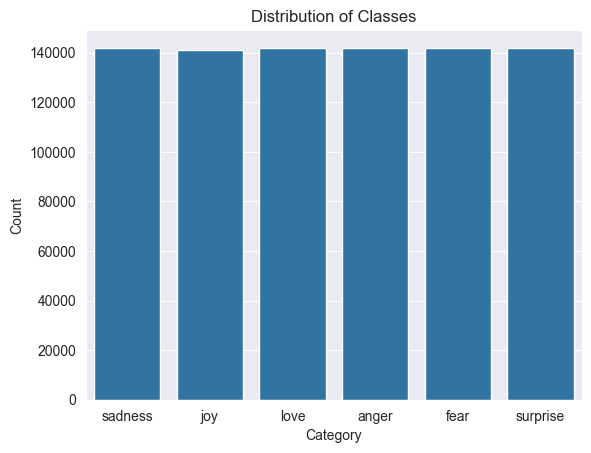

In [105]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(np.arange(len(categories)), categories)
plt.show()

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(df_train.text, df_train.label)
labels = model.predict(df_test.text)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test.label, labels)

0.8880585615754286

In [124]:
def predict_category(s,df_train=df_train,model=model):
    predict = model.predict([s])
    print(predict)
    return categories[int(predict)]

In [125]:
predict_category("Furrowed brows and narrowed eyes")

[5]


C:\Users\ashwa\AppData\Local\Temp\ipykernel_16856\2407005967.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return categories[int(predict)]


'surprise'

In [126]:
## Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [130]:
import pickle

In [131]:
with open('Naive_bayes_classifier.pkl','wb') as file:
    pickle.dump(model,file)